<a href="https://colab.research.google.com/github/sinedsec/prodd/blob/master/test_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

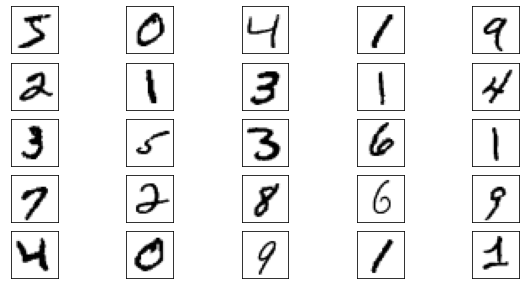

In [4]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [15]:

model1 = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model1.summary()) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)              

In [8]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [9]:

model1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [10]:
model1.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3037 - accuracy: 0.9082 - val_loss: 0.2021 - val_accuracy: 0.9437
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1416 - accuracy: 0.9598 - val_loss: 0.1362 - val_accuracy: 0.9628
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1049 - accuracy: 0.9710 - val_loss: 0.1124 - val_accuracy: 0.9703
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0830 - accuracy: 0.9766 - val_loss: 0.1134 - val_accuracy: 0.9700
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0729 - accuracy: 0.9800 - val_loss: 0.1122 - val_accuracy: 0.9714


In [12]:
model1.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9734


[0.09802071750164032, 0.9733999967575073]

[[4.4745093e-07 3.8172391e-08 9.6454784e-08 2.6308024e-05 2.3806562e-05
  2.9857696e-07 7.3889517e-10 1.0960004e-04 4.3052038e-05 9.9979645e-01]]
9


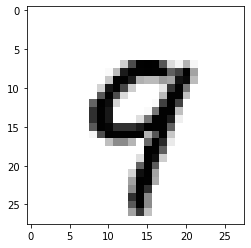

In [14]:
n = 12
x = np.expand_dims(x_test[n], axis=0)
res = model1.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()